# Sentiment Analysis - Roman Urdu Data
## Background
A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis, however, they need help with under-resourced languages.

## Goal
Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.


## Approach

### Data Load & Preprocessing 
    1. Load data into pandas data frame
    2. Clean and preprocess data. Split data into train, validation and test
### Model Selection
    1. Try different models
    2. Evaluate performance
    3. Select best model
### Enhanced Detection of Negative Sentiment
    1. Fine tune model.
    2. Implement ways to increase Recall of Negative Sentiment
    
    
## Important Considerations
1. Since it is for low resource languages and we want to expand it to multiple languages, I did
    1. Minimum cleaning of data. Nothing language specific
    2. No use of NLTK, Stemming and Lemmatization. Stemming, Lemmatization and Stop Words  will  vary with languages.
    3. I am not sure on how much of support  for above is available for Urdu. I could have created stop words and stemming for Urdu but that may not be feasible with time I had. Also, we would have lost the flexibility while applying it to other low resource languages.
2. Considering time availability, limited hyper parameter tuning was performed

## Performance Evaluation Metric
1. To evaluate multiclass models, we could have used Macro Average or Micro Average. See details below.
2. We had also focused on precision/recall of Negative sentiments records as that was a focus area.

### Macro Average
Average of individual performance metrics (e.g. Precision/Recall for all classes). If metric for one class is high and other low, it will average out.

For 3 classes A, B & C, it will be defined as   
$Macro Average Precision = \frac{ 𝑃_{A} + 𝑃_{B} + 𝑃_{C} }{3} $  
Where $𝑃_{A}$ , $𝑃_{B}$ and $𝑃_{C}$ are precisions for classes A, B and C 

### Micro Average
Take  True Positives and False Positives of all classes into account in one calculation.
For 3 classes A, B & C, it will be defined as -
$Micro Average F1 Score = \frac{ T𝑃_{A} + T𝑃_{B} + T𝑃_{C} }{T𝑃_{A} + T𝑃_{B} + T𝑃_{C} + F𝑃_{A} + F𝑃_{B} + F𝑃_{C}} $  For micro average, Precision , Recall and F1 Score will be same.
Where $T𝑃_{A}$, $T𝑃_{B}$ and  $T𝑃_{C}$ are true positives for class A, B and C respectively. $F𝑃_{A}$, $F𝑃_{B}$ and  $F𝑃_{C}$ are false positives for classes A, B and C respectively.

**We used Micro Average F1-Score for Model Selection**

## Models Summary
All scores below are on test data. Model was trained using train data. Validation data was used to decide hyper parameter tuning such as number of epochs. Test data was not used any part of training or tuning process.

| Sr | Model                           | Micro Avg F1 | Prec- Neg Sent | Rec-Neg Sent | Comment                          |
|----|---------------------------------|--------------|----------------|--------------|----------------------------------|
| 1  | Word Count Model                | 0.635        | 0.62            | 0.50         | Simple & interpretable           |
| 2  | TF IDF & SVD                    | 0.595        | 0.56           | 0.47         | Lower than base model                                 |
| 3A | Word2Vec with Sentence Embed.   | 0.610        | 0.54           | 0.55         | Word embed. used in Models 4 & 7 |
| 3B | FastText with Sentence Embed.   | 0.610        | 0.53           | 0.57         | Very close to Word2vec                                 |
| 4  | LSTM with Word2vec              | 0.650        | 0.58            | 0.62         | Uses Word2vec from 3A                    |
| 5  | LSTM without pre-created embed. | 0.665        | 0.62           | 0.51         | Embed. as part of network        |
| 6  | CNN without pre-created embed.*  | 0.672        | 0.65            | 0.56        | Embed. as part of network        |
| 7  | CNN with Word2vec               | 0.659        | 0.61           | 0.58         | Uses Word2vec from 3A                   |

1.	I am looking at Micro Avg. F1 as well as Precision/Recall on negative sentiment to select models
2.	Based on above I am **picking Model 6 (CNN without pre-created embeddings)** as -
    1.	Model performance is on high side even though may not be absolutely highest
    2.	CNN model is much faster than LSTM models (Models 4 and 5)
    3.	This is little simpler than CNN with Word2vec (Model 7) as that requires maintaining Word2vec embedding.
    4.	Taken this model further to make detection of negative sentiment better


## Boosting Detection of Negative Sentiment
| Sr | Model                        | Micro Avg F1 | Prec- Neg Sent | Rec-Neg Sent | Comment                                |
|----|------------------------------|--------------|----------------|--------------|----------------------------------------|
| 8  | CNN Model with Class Weights | 0.660        | 0.58           | 0.63         | Recall for -ve sentiment  is up        |
| 9  | CNN Model with Undersampling  | 0.644        | 0.57           | 0.62         | Recall for -ve sentiment  is up        |
| 10 | Ensembel of 2 CNN Models *    | 0.613        | 0.47           | 0.78         | Recall significantly up for -ve senti. |
| 11 | CNN - Regression Model       | 0.462        | 0.38           | 0.83         | Recall and Precision are adjustable     |

We tried different tweaks to CNN model ( Model 6) to increase sensitivity for Negative Sentiment. I think **Ensemble of 2 CNN Models (Model 10) is best overall**. It uses one 3 classes model and another 2 classes model. If a text is classified by a 2 class model as Negative sentiment, it is predicted as Negative. Otherwise we run 3 class Model and it can predict Sentiment as Negative, Neutral or Positive. 


## Business Outcomes
1.	We could get reasonable performance for prediction as shown above.
2.	Our validation and test performances are in line so these models are generalizable. We could have done K-fold validation to prove it further.
3.	Since we did not use language specific things, same models can be used for different languages.
4.	Word count model (Model 1) has given good performance, so we can use it if interpretability is important. Even though performance is less than CNN/LSTM models, we can see individual words impacting Sentiments.
5. My recommendation is to use CNN Conv-1d (Model 6) for general prediction of 3 classes and Ensemble of 2 models (Model 10) for boosted performance on negative sentiment detection. I provided prediction function for these 2 at the end of notebook. We can use these functions for production implementation.


## Challenges
1.	As it is non-English data we could not do pre-processing steps like
    1.	Stop words
    2.	Lemmatizing
    3.	Stemming
2.	The amount of data is very limited for word embedding or deep learning algorithms.
3.	It was hard to make sense of data or words at many places


## Future Improvements
1.	We can tune hyper parameters to get better performance.
2.	We can come up with language specific stop words and lemmatization, which can improve performance. There were few things available on net but I did not use those to make sure that model can run on different languages. Besides validating those language specific things would have taken time.
3.	We need to get more data to make improvement in deep learning models.
4.	Even if we get large quantity unlabeled data in the specific language , we can create better word embeddings so that we can give better performance.
5. We can use some kind of outlier detection (e.g. un-supervised clustering or auto encoders) to detect outliers and remove those from data. 
6. We can do K-Fold validation or validation on multiple test sets.


## Importing libraries
1. Importing all libraries at one place
2. These includes sklearn, tensorflow and other libraries
3. Tensorflow 2 will be needed to run this code

In [1]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import  matplotlib.pyplot as plt
import seaborn as sns
import  matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors
from xgboost import XGBClassifier
import random
import imblearn
import pickle

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from numpy.random import seed
seed(777)


## Common Functions:
### Text Cleaner
This function cleans text but does not use language specific stop words, stemming or lemmatization. So it can be used across low resource languages. Very basic cleaning is used here.

### Model Performance
This function is used for model performance across different models.



In [2]:

def text_cleaner(text): 
    ''' Function for mimimal cleaning. It converts emojis to text, remove several special characters
    and words with digits only
    '''
    for emot in UNICODE_EMO:
            text = text.replace(emot, UNICODE_EMO[emot] )                           
    text = text.lower()
    
    #Remove special characters except few
    text = re.sub("[^a-zA-Z0-9?/_%\n-.?!]"," ", text)
    
    #Words with digits only
    text = re.sub(r'\b[0-9]+\b\s*', '', text)
    #text = ' '.join([x for x in text.split() if x not in stopwords ]) 
    
    return text

def model_acc(y_true, pred):
    '''
    Function to calculate model performance for various models
    '''
    print( 'Micro Avg F1 Score:', round(f1_score(y_true, pred, average='micro'), 3) )
    print ('Classification Report:')
    print (classification_report(y_true, pred) )

    mat = confusion_matrix(y_true, pred.flatten())
    sns.heatmap(mat, square=False, annot=True, fmt='d', cbar=False, linewidths=.5,
                xticklabels= ['Negative', 'Neutral', 'Positive'], yticklabels= ['Negative', 'Neutral', 'Positive'] )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    


## Data load and Exploratory Data Analysis
1. Loaded data from given .csv file into pandas data frame. 
2. There was a misspelled class "Neaative". Changed that to "Negative"
3. Checked distribution of different target classes
4. **Mapped Negative to 0, Neutral to 1 and Positive to 2**


Data Shape: (20229, 2)


,Text,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive


Neutral     0.441396
Positive    0.297247
Negative    0.261308
Neative     0.000049
Name: Sentiment, dtype: float64

,Text,Sentiment,Target
2328,Chiragh jalata raha se le kar â€œ Mohabbat Ho ...,Positive,2
6084,Sir: jo subha meri pehli class main baj raha tha.,Neutral,1
2655,sirf moqa milne ki baat hai agar ye musalsal m...,Positive,2
2631,Jis shakhs ne sari zindagi nazreen aur tamasha...,Positive,2
19579,Hahaha itni b pyari ni hai yr wo,Negative,0


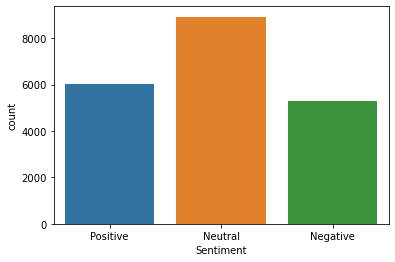

In [3]:
df = pd.read_csv('Roman Urdu DataSet.csv', header = None, encoding="utf-8")
df.drop(columns= 2, inplace = True)
df.columns = ['Text', 'Sentiment']
print("Data Shape:", df.shape)
display(df.head(3))

display(df['Sentiment'].value_counts(normalize = True))
df['Sentiment'] = df['Sentiment'].replace('Neative', 'Negative')
sns.countplot(x='Sentiment', data = df);

df['Target'] = df['Sentiment'].map({'Negative': 0, 'Neutral': 1,'Positive': 2 })
df.sample(5)

## Data Cleaning:
1. Applied text_cleaner function for minimal cleaning of data
2. Added a column Text_p to have processed/cleaned text
3. Removed rows with blank or null values in text. This reduced 20,229 records to 20102 records

In [4]:
df['Text']  = df.Text.astype(str)
df['Text_p'] = df['Text'].apply(lambda x: text_cleaner(x))
df['Text_p'] = df['Text_p'].str.strip()
df = df[df.Text_p.notnull()]
df = df[df.Text_p != '']
print("Data Shape:", df.shape)

Data Shape: (20102, 4)


## Additional Data Exploration
1. Looked distribution of length of reviews. We have longest review as 292 words and shortest review is 1 word.
2. Looking at review length distribution, found that only few reviews are much longer e.g. **only 38 reviews are more than 100 words. Only 55 reviews are between 75 and 100 words. The median length of the review is only 9 words.**
3. Decided to keep review text at 99 percentile level, which is at 61 words. **This means we will only look at 1st 61 words of the review and discard remaining words.** This will reduce processing need for deep learning models (LSTM / CNN etc.)

Review Length Summary: 
 count    20102.000000
mean        13.259178
std         13.230142
min          1.000000
25%          6.000000
50%          9.000000
75%         17.000000
max        292.000000
Name: Review_len, dtype: float64
Longest review is 292 words. Shortest review is 1 words.


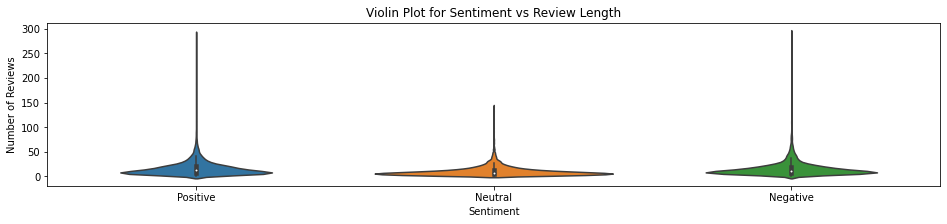

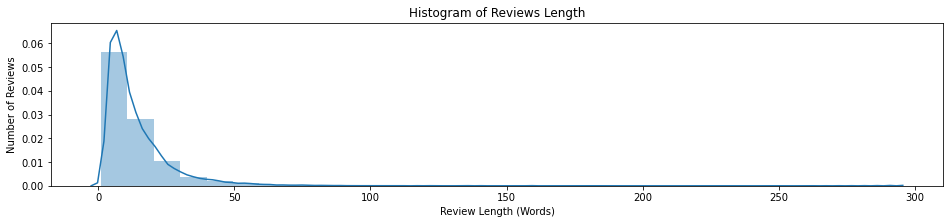

Review counts in different bins:-


(-0.001, 25.0]    17849
(25.0, 50.0]       1865
(50.0, 75.0]        295
(75.0, 100.0]        55
(100.0, inf]         38
Name: Review_len, dtype: int64

Number of words for 99th perrcentile or below: 61


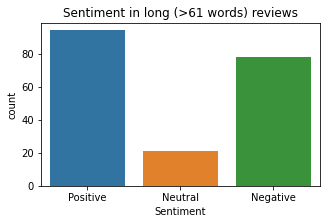

In [5]:
#plot for number of words in reviews
df['Review_len'] = df.Text_p.str.split().str.len()

print('Review Length Summary: \n' , df['Review_len'].describe())
print (f"Longest review is {df['Review_len'].max()} words. Shortest review is {df['Review_len'].min()} words.")

#Violin plot to see review lengths by sentiments
plt.figure(figsize=(16,3))
sns.violinplot(x = 'Sentiment', y ='Review_len', data =  df)
plt.title('Violin Plot for Sentiment vs Review Length')
plt.ylabel('Number of Reviews')
plt.show()

#Review lengths distribution
plt.figure(figsize= (16,3) )
sns.distplot(df.Review_len, kde= True, bins = 30)
plt.title('Histogram of Reviews Length')
plt.xlabel('Review Length (Words)')
plt.ylabel('Number of Reviews')
plt.show()

print('Review counts in different bins:-')
display(df.Review_len.value_counts(bins=[0,25,50,75,100, math.inf ]))

maxlen = int(df['Review_len'].quantile(.99))
print ( 'Number of words for 99th perrcentile or below:' ,maxlen  )

plt.figure(figsize= (5,3) )
sns.countplot(x='Sentiment', data = df[df.Review_len > 61]);
plt.title('Sentiment in long (>61 words) reviews')
plt.show()



## Cutting the reviews only to maxlen (99th percentile or 61 words)
### As we see in violin plot below:
1. We have thin tails, starting around 30 or 40 words 
2. We could have kept max length of reviews as 30 or 40 but decided to keep to 61 (99th percentile) as we are planning to use dep learning model and those could benefit with additional information.
3. This is a small dataset. We may have longer reviews in additional data. Hence decided not to cut down review length much.

Maximum number of words taken from each text: 61


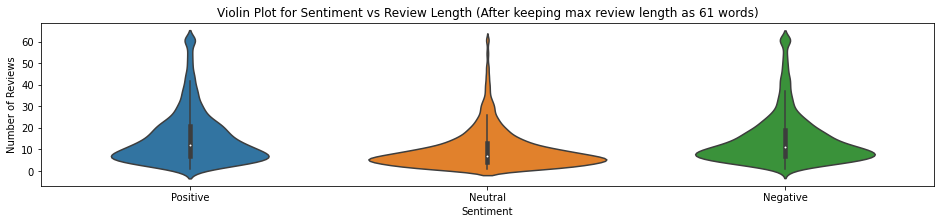

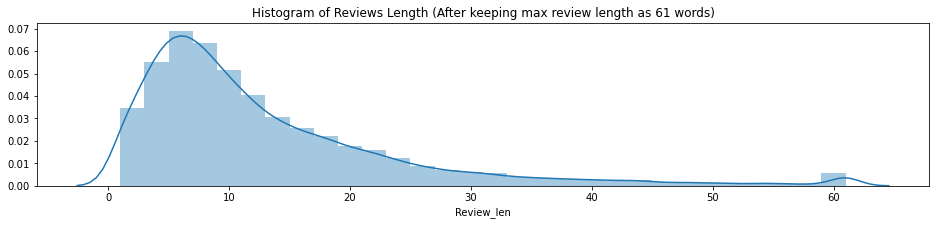

In [6]:
# Cutting the reviews only to maxlen (61 words)

print ('Maximum number of words taken from each text:', maxlen)

df.Text_p = df.Text_p.apply(lambda x: ' '.join(x.split()[: maxlen]) )
df['Review_len'] = df.Text_p.str.split().str.len()

plt.figure(figsize=(16,3))
sns.violinplot(x = 'Sentiment', y ='Review_len', data =  df)
#sns.swarmplot(x = 'Sentiment', y ='Review_len', data =  df)
plt.title('Violin Plot for Sentiment vs Review Length (After keeping max review length as 61 words)')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize= (16,3) )
sns.distplot(df.Review_len, kde= True, bins = 30)
plt.title('Histogram of Reviews Length (After keeping max review length as 61 words)')
plt.show()

## Train Test Split
1. Data is split into train, test and validation with ratio of 80%, 10% and 10% respectively
2. Validation data is mainly used in deep learning approaches. Others used just to test performance at 2 different test sets.
3. Validation data is used to get right number of epochs.
4. Test data is treated like production data and it was made sure that test data is never seen by model. Creating of word embeddings data was done only using train and any hyper parameter tuning was done using validation data.
5. I did not do K-Fold cross validation here but comparing performance on validation data and test data gives idea about model stability and generalizability.



In [7]:
seed(777)
df_train, df_test = train_test_split(df, test_size = .2, random_state = 777 )
#Splitting train further into train and validation
df_test, df_valid = train_test_split(df_test, test_size = .5, random_state = 777 )
print(f'Records in Training Data: {df_train.shape[0]} \nRecords in Validation Data: {df_valid.shape[0]}\nRecords in Test Data: {df_test.shape[0]}')

Records in Training Data: 16081 
Records in Validation Data: 2011
Records in Test Data: 2010


### This completes data preparation. Following models can be run after this 

## 1. Simplest Model :  Based on wordcount
Created a simple model using count vectorizer to get a base line. This model is based on words count and logistic regression so it is highly interpretable. We can see exact words and their weights towards giving us sentiment!

Starting word count model..

Model Performance on Validation Data :
Micro Avg F1 Score: 0.623
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49       512
           1       0.61      0.77      0.68       866
           2       0.67      0.59      0.63       633

    accuracy                           0.62      2011
   macro avg       0.62      0.59      0.60      2011
weighted avg       0.62      0.62      0.62      2011



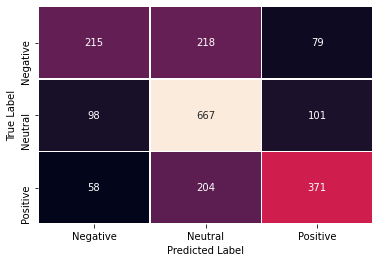


Model Performance on Test Data :
Micro Avg F1 Score: 0.635
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       522
           1       0.62      0.79      0.70       881
           2       0.68      0.53      0.59       607

    accuracy                           0.63      2010
   macro avg       0.64      0.61      0.61      2010
weighted avg       0.64      0.63      0.63      2010



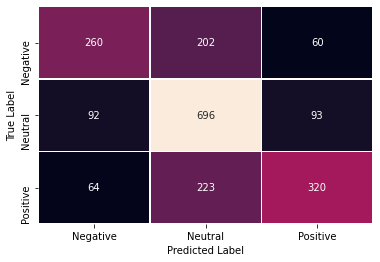

In [8]:
print ('Starting word count model..')
seed(777)

cv = CountVectorizer(max_features= 1500)
X_train = cv.fit_transform(df_train.Text_p.values).toarray()
X_test = cv.transform(df_test.Text_p.values).toarray()
X_valid = cv.transform(df_valid.Text_p.values).toarray()
y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
clf = LogisticRegression(multi_class = 'multinomial', max_iter = 250)
clf.fit(X_train, y_train)

print ('\nModel Performance on Validation Data :')
y_pred = clf.predict(X_valid)
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = clf.predict(X_test)
model_acc(y_test, y_pred)

## 2. TF-IDF Model
1. Created TF-IDF vector for reviews. Used unigrams and bigrams for terms(words)
2. Applied SVD to reduce dimensionality of TF-IDF)
3. Used XGBoost classifier

Starting TF-IDF model..
Vocab Size: 3654

Model Performance on Validation Data :
Micro Avg F1 Score: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.40      0.45       512
           1       0.62      0.74      0.67       866
           2       0.62      0.57      0.59       633

    accuracy                           0.60      2011
   macro avg       0.59      0.57      0.57      2011
weighted avg       0.59      0.60      0.59      2011



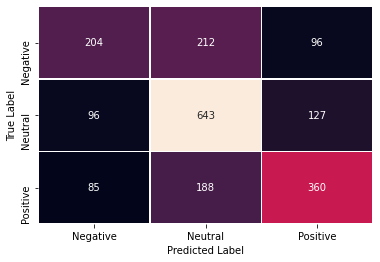


Model Performance on Test Data :
Micro Avg F1 Score: 0.595
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       522
           1       0.60      0.74      0.66       881
           2       0.62      0.50      0.55       607

    accuracy                           0.60      2010
   macro avg       0.59      0.57      0.57      2010
weighted avg       0.59      0.60      0.59      2010



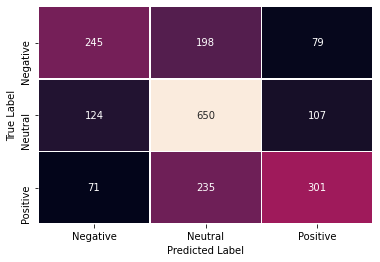

In [9]:
print ('Starting TF-IDF model..')
seed(777)

#Training parameters
num_topics= 500
max_df = .50
min_df = 10
ngram_range = (1,2)
n_iter = 500

# converting corpus to tfidf vectors 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df = max_df, min_df = min_df, ngram_range = ngram_range)

# SVD Model: 
svd_model = TruncatedSVD(n_components=num_topics,  algorithm='randomized', n_iter = n_iter )

# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', tfidf_vectorizer), 
                            ('svd', svd_model)])


X_train = svd_transformer.fit_transform(df_train['Text_p'].values)
print("Vocab Size:", len(tfidf_vectorizer.vocabulary_))
y_train = df_train['Target'].values
#print(X_train.shape, y_train.shape)
#clf = LogisticRegression(multi_class = 'multinomial', max_iter = 250)
clf = XGBClassifier()
clf.fit(X_train, y_train)

X_test = svd_transformer.transform(df_test['Text_p'].values)
y_test = df_test['Target'].values
#print(X_test.shape, y_test.shape)

X_valid = svd_transformer.transform(df_valid['Text_p'].values)
y_valid = df_valid['Target'].values

print ('\nModel Performance on Validation Data :')
y_pred = clf.predict(X_valid)
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = clf.predict(X_test)
model_acc(y_test, y_pred)

## Word2Vec/FastText Embedding with SIF Sentence Embedding
1.	This model creates Word2Vec and FastText embeddings so as to take contexts of words into account.
2.	Using embeddings we create sentence embedding for each review using weighted average of word embeddings
3.	We use sentence embeddings as feature vector to run multiclass classification

In [10]:
print ('Starting Word Embeddings / Sentence Embedding  model..')
seed(777)

text_vecs = [text.split() for text in df_train['Text_p'].values]
def tsne_plot(embed_type, num_words):
    ''' This function is to create words proximity plots given the words embeddings
    '''
    saved_embedding_loc = './'
    labels = []
    tokens = []
    
    if embed_type == 'Word2Vec':
            model_vectors = KeyedVectors.load(saved_embedding_loc + 'W2V_vectors.kv')
    elif embed_type == 'FastText':
            model_vectors = KeyedVectors.load(saved_embedding_loc + 'FastText_vectors.kv') 
       

    for word in random.sample(model_vectors.vocab.keys(), num_words):
        tokens.append(model_vectors[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(num_words):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(20, 20),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
def get_sentence_embedding(embed_sentences,embed_type, saved_embedding_loc = './', a = 0.001):
    ''' This function creates sentence embedding by taking weighted average of word embeddings and using SIF 
    (Smooth Inverse Frequency) approach. Parameter a determines smoothing factor,
    '''

    if embed_type == 'Word2Vec':
        model_vectors = KeyedVectors.load(saved_embedding_loc + 'W2V_vectors.kv')
        vec_size = model_vectors.vector_size
    elif embed_type == 'FastText':
        model_vectors = KeyedVectors.load(saved_embedding_loc + 'FastText_vectors.kv') 
        vec_size = model_vectors.vector_size
    vlookup = model_vectors.vocab
    word_frequencies = {}
    for word in vlookup:
        word_frequencies[word] = vlookup[word].count
    total_freq = sum(word_frequencies.values())    
    #print(total_freq)

    sentence_embeddings = []   
    for i,sentence in enumerate(embed_sentences.values):
        tokens = [token for token in sentence[0].split() if token in model_vectors] 
        if len(tokens) == 0:
            sen_embedding = [0]*vec_size
        else:
            weights = [a / (a + word_frequencies.get(token, 0) / total_freq) for token in tokens] 
            sen_embedding = np.average([model_vectors[token] for token in tokens], axis=0, weights=weights)
        sentence_embeddings.append(sen_embedding)                    

    sentence_embeddings_df = pd.DataFrame(sentence_embeddings)

    return sentence_embeddings_df


Starting Word Embeddings / Sentence Embedding  model..


In [2]:

#text_vecs

### Used gensim library to create embeddings

In [11]:
seed(777)
#Word2vec embeddings
w2v_model = Word2Vec(sentences = text_vecs, size = 75, window = 5,
                             alpha = .01, sg = 1, negative = 5,
                             iter = 250, min_count = 5, workers = 8)      
print('Word2Vec Vocab Size:', len(w2v_model.wv.vocab))
w2v_word_vectors = w2v_model.wv
w2v_word_vectors.save( 'W2V_vectors.kv')

#FastText Embedings
fasttext_model = FastText(sentences = text_vecs, size = 75, window = 5,
                             alpha = .01, sg = 1, negative = 5,
                             iter = 250, min_count = 5, workers = 8)
print('FastText Vocab Size:',len(fasttext_model.wv.vocab))
fasttext_word_vectors =fasttext_model.wv
fasttext_word_vectors.save('FastText_vectors.kv')

Word2Vec Vocab Size: 4935
FastText Vocab Size: 4935


### TSNE Plots
1. Created TSNE Plot for FastText Embedding
2. Created TSNE Plot for Word2Vec Embedding

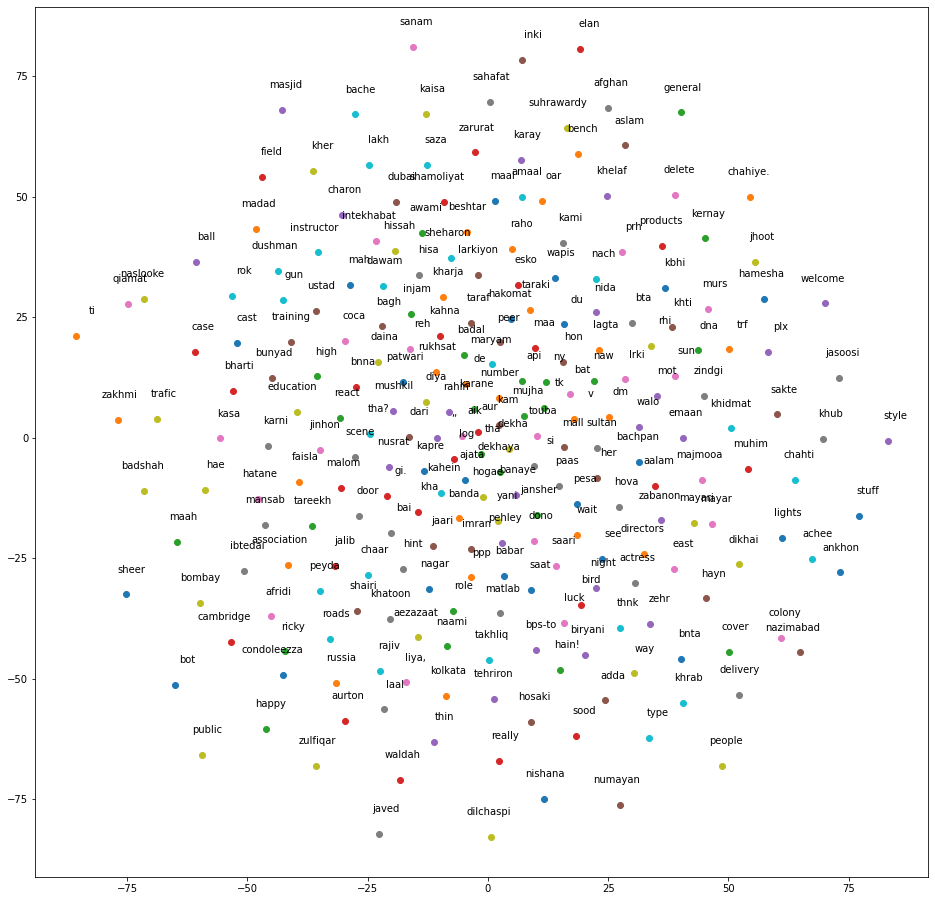

In [12]:
tsne_plot( 'FastText', 250)

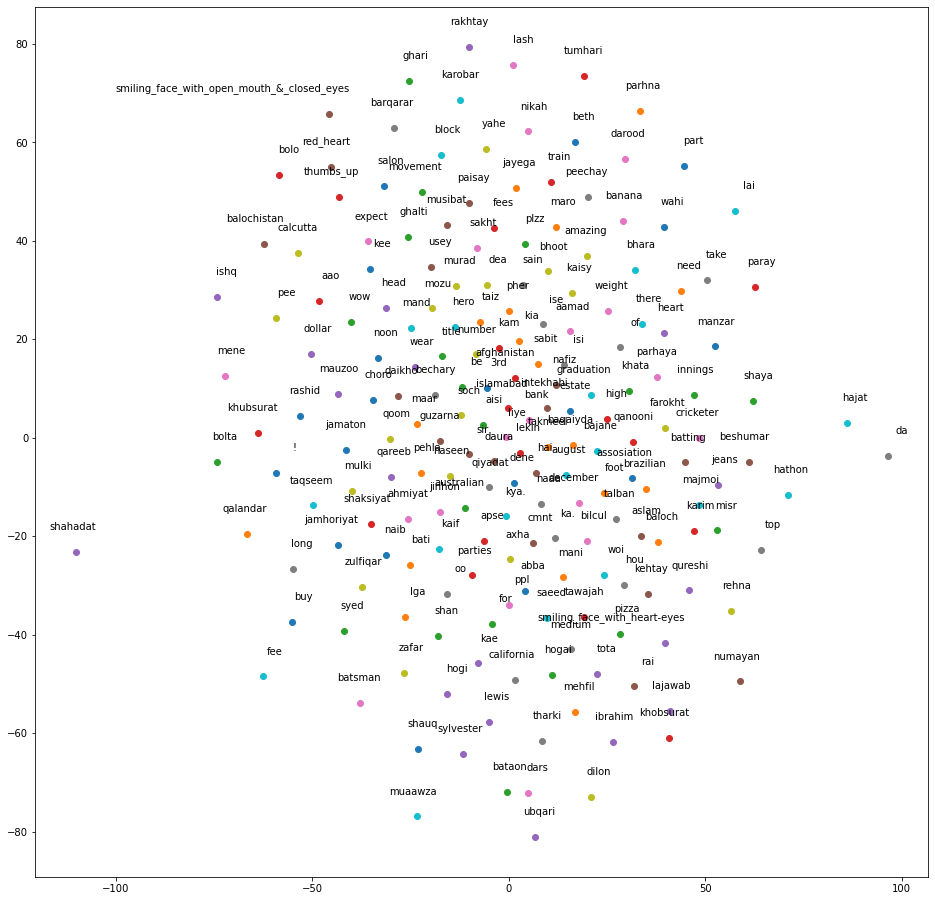

In [13]:
tsne_plot( 'Word2Vec', 200)

Word Embeddings / Sentence Embedding -  Model Performance :- 
FastText

Model Performance on Validation Data :
Micro Avg F1 Score: 0.621
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       512
           1       0.68      0.66      0.67       866
           2       0.62      0.61      0.61       633

    accuracy                           0.62      2011
   macro avg       0.61      0.61      0.61      2011
weighted avg       0.62      0.62      0.62      2011



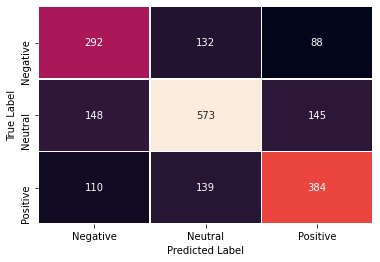


Model Performance on Test Data :
Micro Avg F1 Score: 0.612
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       522
           1       0.65      0.66      0.66       881
           2       0.62      0.54      0.58       607

    accuracy                           0.61      2010
   macro avg       0.61      0.60      0.60      2010
weighted avg       0.61      0.61      0.61      2010



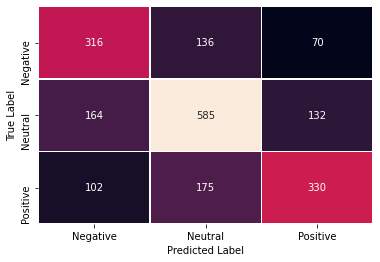

Word2Vec

Model Performance on Validation Data :
Micro Avg F1 Score: 0.615
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.54       512
           1       0.65      0.64      0.65       866
           2       0.62      0.65      0.63       633

    accuracy                           0.62      2011
   macro avg       0.61      0.61      0.61      2011
weighted avg       0.62      0.62      0.61      2011



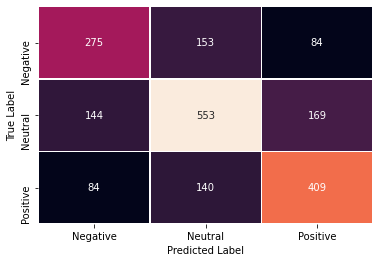


Model Performance on Test Data :
Micro Avg F1 Score: 0.618
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       522
           1       0.67      0.68      0.67       881
           2       0.61      0.58      0.60       607

    accuracy                           0.62      2010
   macro avg       0.61      0.61      0.61      2010
weighted avg       0.62      0.62      0.62      2010



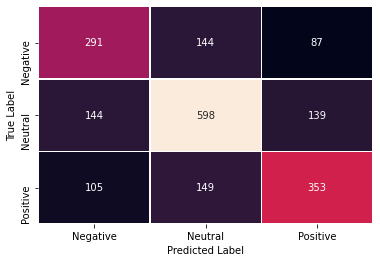

In [14]:
#Classification using Word Embeddings and Sentence Embeddings
print ('Word Embeddings / Sentence Embedding -  Model Performance :- ')
for embed_type in ['FastText', 'Word2Vec']:
    print(embed_type)
    X_train = get_sentence_embedding(df_train[['Text_p']], embed_type).values
    y_train = df_train['Target'].values
    
    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
  

    X_valid = get_sentence_embedding(df_valid[['Text_p']], embed_type).values
    y_valid = df_valid['Target'].values
    
    X_test = get_sentence_embedding(df_test[['Text_p']], embed_type).values
    y_test = df_test['Target'].values
    
    print ('\nModel Performance on Validation Data :')
    y_pred = clf.predict(X_valid)
    model_acc(y_valid, y_pred)

    print ('\nModel Performance on Test Data :')
    y_pred = clf.predict(X_test)
    model_acc(y_test, y_pred)


## 4. LSTM Model Using Word2Vec Embedding
1.	Created LSTM Model using Word2Vec embeddings created in previous step.
2.	Word2Vec gives us dense representation of words, along with context and LSTM handles word order dependencies

Starting LSTM Model with Word2vec embedings..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.43859, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.43859 to 0.48782, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.48782 to 0.51815, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.51815 to 0.52263, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.52263 to 0.53108, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.53108

Epoch 00007: val_sparse_categorical_accuracy improved from 0.53108 to 0.54451, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy improved from 0.54451 to 0.54600, saving model to best_model.hdf5

Epoch 00009: val_sparse_categorical_accuracy improved from 0.54600 to 0.57832, saving model to be

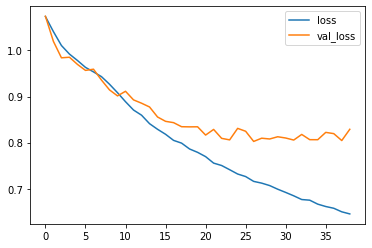

In [15]:
print ('Starting LSTM Model with Word2vec embedings..')
seed(777)

saved_embedding_loc = './'
model_vectors = KeyedVectors.load(saved_embedding_loc + 'W2V_vectors.kv')

embed_weights = model_vectors.vectors
#print(embed_weights.shape)
vocab_size, embed_size = embed_weights.shape
vocab_size = vocab_size+1 # for word not in dict 
embed_weights = np.vstack([embed_weights, [0]*embed_size]) # adding a row for something not in vocab
#print (embed_weights.shape, vocab_size, embed_size)


def word2idx(word):
    try:
        return model_vectors.vocab[word].index
    except KeyError:
        return vocab_size - 1
def idx2word(idx):
    return model_vectors.index2word[idx]

X_train = np.zeros( (df_train.shape[0], maxlen) )
X_test = np.zeros( (df_test.shape[0], maxlen) )
X_valid = np.zeros( (df_valid.shape[0], maxlen) )

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

for i, doc in enumerate(df_train.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_train[i,j] = word2idx(word)
        
for i, doc in enumerate(df_test.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_test[i,j] = word2idx(word)

for i, doc in enumerate(df_valid.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_valid[i,j] = word2idx(word)

model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embed_weights])) #The embedding layer
model.add(LSTM(24,dropout=1/3)) #Our LSTM layer
model.add(Dense(10,activation='relu'))

model.add(Dense(3,activation='softmax'))

#opt = Adam()
opt = RMSprop(lr = .0005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], batch_size = 32 ,  verbose = 0)
val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model = load_model('best_model.hdf5')


        

LSTM using Word2vec -  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.664
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       512
           1       0.70      0.71      0.71       866
           2       0.66      0.69      0.67       633

    accuracy                           0.66      2011
   macro avg       0.65      0.65      0.65      2011
weighted avg       0.66      0.66      0.66      2011



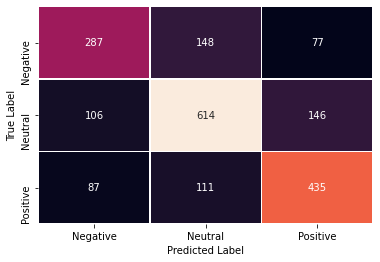


Model Performance on Test Data :
Micro Avg F1 Score: 0.656
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       522
           1       0.70      0.73      0.71       881
           2       0.65      0.63      0.64       607

    accuracy                           0.66      2010
   macro avg       0.64      0.64      0.64      2010
weighted avg       0.65      0.66      0.65      2010



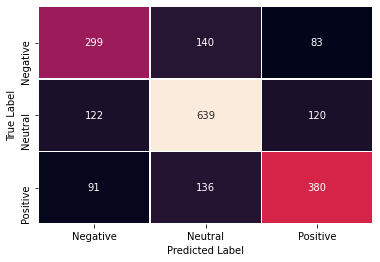

In [16]:
print ('LSTM using Word2vec -  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)

## 5. LSTM Model without pre-created embedddings
1.	Created LSTM Model but did not use pre-created embeddings
2.	In this model embeddings are learned as part of network

Starting LSTM Model without precreated embeddings ..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.43063, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.43063 to 0.53108, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.53108 to 0.56091, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.56091 to 0.57086, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy did not improve from 0.57086

Epoch 00006: val_sparse_categorical_accuracy did not improve from 0.57086

Epoch 00007: val_sparse_categorical_accuracy did not improve from 0.57086

Epoch 00008: val_sparse_categorical_accuracy improved from 0.57086 to 0.60070, saving model to best_model.hdf5

Epoch 00009: val_sparse_categorical_accuracy did not improve from 0.60070

Epoch 00010: val_sparse_categorical_accuracy improved from 0.60070 to 0.61561, saving mod

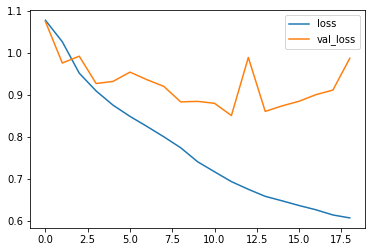

In [17]:
print ('Starting LSTM Model without precreated embeddings ..')
seed(777)

max_words = 5500
embed_dim = 100
tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(df_train.Text_p.values)
X_train = tokenizer.texts_to_sequences(df_train.Text_p.values)
X_test = tokenizer.texts_to_sequences(df_test.Text_p.values)
X_valid = tokenizer.texts_to_sequences(df_valid.Text_p.values)
#print(len(X_train), len(X_test) )

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(LSTM(24,dropout=1/3)) #Our LSTM layer
model.add(Dense(50,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))


opt = RMSprop(lr = .0005)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], batch_size = 32 ,  verbose = 0)


val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model = load_model('best_model.hdf5')



LSTM without precreated embeddings -  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.653
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       512
           1       0.68      0.72      0.70       866
           2       0.70      0.62      0.66       633

    accuracy                           0.65      2011
   macro avg       0.65      0.64      0.64      2011
weighted avg       0.65      0.65      0.65      2011



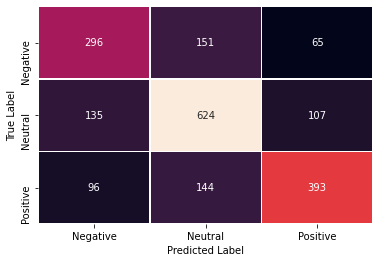


Model Performance on Test Data :
Micro Avg F1 Score: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       522
           1       0.69      0.74      0.71       881
           2       0.71      0.58      0.64       607

    accuracy                           0.66      2010
   macro avg       0.65      0.64      0.64      2010
weighted avg       0.66      0.66      0.65      2010



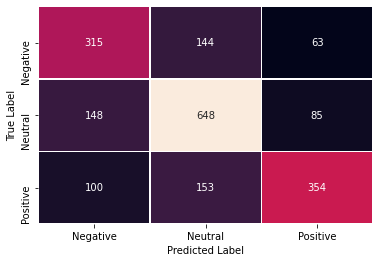

In [18]:
print ('LSTM without precreated embeddings -  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)

## 6. CNN Model without pre-created embeddings
1. Created CNN Model but did not use pre-created embeddings
2. Using Conv1D, model is able to see word dependencies and order
3. In this model embeddings are learned as part of network
4. CNN based model is less resource intensive than LSTM and runs much faster

Starting CNN Model without precreated embeddings ..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.43063, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.43063 to 0.45748, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.45748 to 0.51815, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.51815 to 0.55942, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.55942 to 0.58727, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy improved from 0.58727 to 0.60517, saving model to best_model.hdf5

Epoch 00007: val_sparse_categorical_accuracy improved from 0.60517 to 0.62655, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy improved from 0.62655 to 0.64296, saving model to best_model.hdf5

Epoch 00009: val_sparse_categorical_accuracy improved 

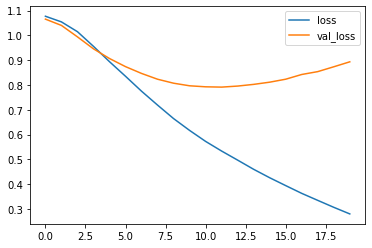

In [19]:
print ('Starting CNN Model without precreated embeddings ..')
seed(777)

embed_dim = 100
max_words = 5500

tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(df_train.Text_p.values)
X_train = tokenizer.texts_to_sequences(df_train.Text_p.values)
X_test = tokenizer.texts_to_sequences(df_test.Text_p.values)
X_valid = tokenizer.texts_to_sequences(df_valid.Text_p.values)
#print(len(X_train), len(X_test) )

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))

opt = Adam(.00005)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], batch_size = 32, verbose = 0)


val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model_cnn = load_model('best_model.hdf5')



CNN without precreated word embeddings-  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.672
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       512
           1       0.69      0.74      0.71       866
           2       0.68      0.68      0.68       633

    accuracy                           0.67      2011
   macro avg       0.67      0.66      0.66      2011
weighted avg       0.67      0.67      0.67      2011



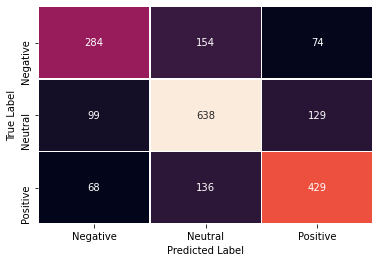


Model Performance on Test Data :
Micro Avg F1 Score: 0.663
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       522
           1       0.68      0.75      0.71       881
           2       0.66      0.60      0.63       607

    accuracy                           0.66      2010
   macro avg       0.66      0.65      0.65      2010
weighted avg       0.66      0.66      0.66      2010



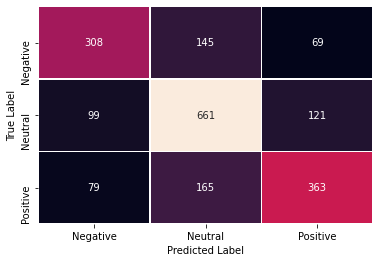

In [20]:
print ('CNN without precreated word embeddings-  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model_cnn.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model_cnn.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)



In [21]:
#Saving model and associated training objects 
model_cnn.save('model_cnn.hd5')
model_cnn_dict = { 'tokenizer': tokenizer, 'maxlen':maxlen,'text_cleaner': text_cleaner}
pickle.dump(model_cnn_dict, open('model_cnn_dict.pkl', 'wb'))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_cnn.hd5/assets


## 7. CNN Model using Word2vec embeddings
1. Created CNN Model using Word2vec embedding.
2. Using Conv1D, model is able to see word dependencies and order
3. CNN based model is less resource intensive than LSTM and runs much faster

Starting CNN Model with Word2vec embeddings ..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.49627, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.49627 to 0.52710, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.52710 to 0.56241, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.56241 to 0.57285, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.57285 to 0.58130, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy improved from 0.58130 to 0.58677, saving model to best_model.hdf5

Epoch 00007: val_sparse_categorical_accuracy improved from 0.58677 to 0.60020, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy did not improve from 0.60020

Epoch 00009: val_sparse_categorical_accuracy improved from 0.60020 to 0.61711, saving model to b

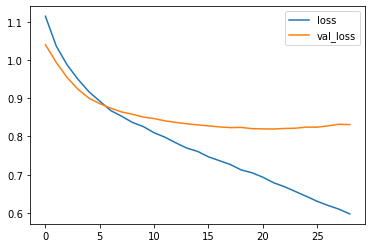

In [22]:
print ('Starting CNN Model with Word2vec embeddings ..')
seed(777)

saved_embedding_loc = './'
model_vectors = KeyedVectors.load(saved_embedding_loc + 'W2V_vectors.kv')

embed_weights = model_vectors.vectors
#print(embed_weights.shape)
vocab_size, embed_size = embed_weights.shape
vocab_size = vocab_size+1 # for word not in dict 
embed_weights = np.vstack([embed_weights, [0]*embed_size]) # adding a row for something not in vocab
#print (embed_weights.shape, vocab_size, embed_size)


def word2idx(word):
    try:
        return model_vectors.vocab[word].index
    except KeyError:
        return vocab_size - 1
def idx2word(idx):
    return model_vectors.index2word[idx]

X_train = np.zeros( (df_train.shape[0], maxlen) )
X_test = np.zeros( (df_test.shape[0], maxlen) )
X_valid = np.zeros( (df_valid.shape[0], maxlen) )

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

for i, doc in enumerate(df_train.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_train[i,j] = word2idx(word)
        
for i, doc in enumerate(df_test.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_test[i,j] = word2idx(word)

for i, doc in enumerate(df_valid.Text_p.values):
    for j, word in enumerate(doc.split()):
        X_valid[i,j] = word2idx(word)
        
model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embed_weights])) #The embedding layer
model.add(Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))

opt = Adam(.00005)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], batch_size = 32, verbose = 0)


val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model = load_model('best_model.hdf5')



CNN with Word2vev embeddings -  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.646
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       512
           1       0.68      0.71      0.70       866
           2       0.67      0.62      0.64       633

    accuracy                           0.65      2011
   macro avg       0.64      0.63      0.63      2011
weighted avg       0.65      0.65      0.65      2011



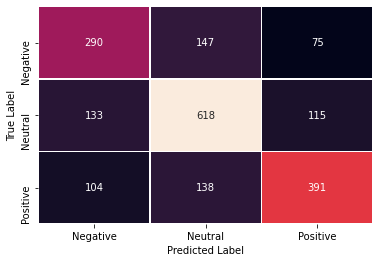


Model Performance on Test Data :
Micro Avg F1 Score: 0.626
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       522
           1       0.67      0.70      0.69       881
           2       0.65      0.55      0.59       607

    accuracy                           0.63      2010
   macro avg       0.62      0.61      0.61      2010
weighted avg       0.63      0.63      0.63      2010



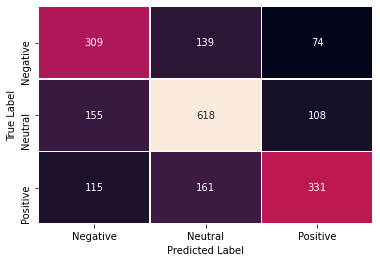

In [23]:
print ('CNN with Word2vev embeddings -  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)

# Boosting Detection of Negative Sentiment
One of our requirement is that we want to effectively detect negative sentiment. I tried few techniques over our CNN model to boost performance on Negative Sentiment class. These includes
1. Adding Class Weights
2. Resampling of data so that each class get fair representation. Tried
    1. Oversampling of minority classes
    2. Under sampling of majority classes
3. As we have an order here - Negative -> Neutral -> Positive.  Tried a regression model using Negative value as -1, Neutral as 0 and Positive as 1.
    1. This model provides flexibility to try different thresholds so that we can focus on individual classes needed. 
    2. Violin plot helps in deciding thresholds as it shows density of prediction scores for 3 types of sentiments


## 8. Adding class weights to CNN model
Negative sentiment is a minority class. Hence adding class weights may improve performance for Negative sentiment detection as class weights will provide additional weight to minority classes for its loss function of prediction scores for 3 types of sentiments

In [24]:
class_weight = dict(zip( [0,1,2], compute_sample_weight('balanced', [0,1,2], df_train.Target.values)))

/Users/sanigam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass indices=[2 2 2 ... 1 2 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Starting CNN Model without precreated embeddings - with class weights ..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.44306, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.44306 to 0.47041, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.47041 to 0.51616, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.51616 to 0.54451, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.54451 to 0.56440, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy improved from 0.56440 to 0.58677, saving model to best_model.hdf5

Epoch 00007: val_sparse_categorical_accuracy improved from 0.58677 to 0.60666, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy improved from 0.60666 to 0.62208, saving model to best_model.hdf5

Epoch 00009: val_sparse_categoric

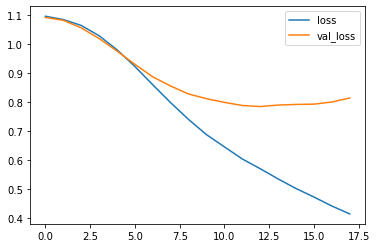

In [25]:
print ('Starting CNN Model without precreated embeddings - with class weights ..')
seed(777)
embed_dim = 100
max_words = 5500

tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(df_train.Text_p.values)
X_train = tokenizer.texts_to_sequences(df_train.Text_p.values)
X_test = tokenizer.texts_to_sequences(df_test.Text_p.values)
X_valid = tokenizer.texts_to_sequences(df_valid.Text_p.values)
#print(len(X_train), len(X_test) )

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))

opt = Adam(.00005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], 
                    batch_size = 32, verbose = 0, class_weight = class_weight)


val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model = load_model('best_model.hdf5')



CNN with Class Weights -  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       512
           1       0.71      0.66      0.68       866
           2       0.65      0.69      0.67       633

    accuracy                           0.66      2011
   macro avg       0.65      0.66      0.65      2011
weighted avg       0.66      0.66      0.66      2011



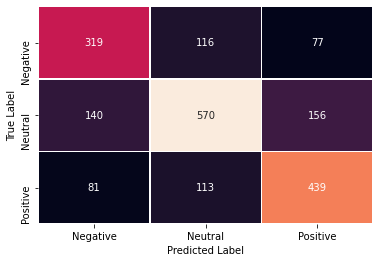


Model Performance on Test Data :
Micro Avg F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       522
           1       0.71      0.69      0.70       881
           2       0.64      0.66      0.65       607

    accuracy                           0.66      2010
   macro avg       0.65      0.65      0.65      2010
weighted avg       0.66      0.66      0.66      2010



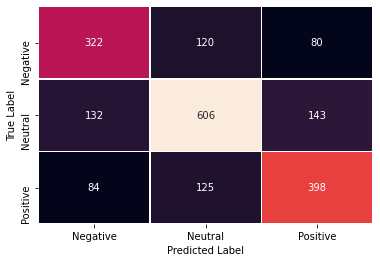

In [26]:
print ('CNN with Class Weights -  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)

## 9. CNN Model with oversampling/under sampling
2nd approach to detect negative sentiment effectively, I tried oversampling and under sampling. Finally I used under sampling of majority classes.


Starting CNN Model without precreated embeddings - over/under sampling..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.42069, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.42069 to 0.49478, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.49478 to 0.53108, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.53108 to 0.55843, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.55843 to 0.57633, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy improved from 0.57633 to 0.60020, saving model to best_model.hdf5

Epoch 00007: val_sparse_categorical_accuracy improved from 0.60020 to 0.61164, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy improved from 0.61164 to 0.62258, saving model to best_model.hdf5

Epoch 00009: val_sparse_categoric

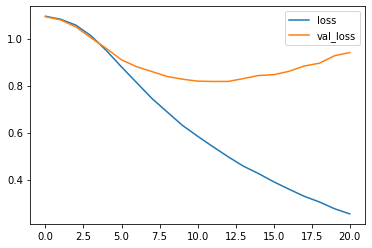

In [27]:
print ('Starting CNN Model without precreated embeddings - over/under sampling..')
seed(777)
embed_dim = 100
max_words = 5500

tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(df_train.Text_p.values)
X_train = tokenizer.texts_to_sequences(df_train.Text_p.values)
X_test = tokenizer.texts_to_sequences(df_test.Text_p.values)
X_valid = tokenizer.texts_to_sequences(df_valid.Text_p.values)
#print(len(X_train), len(X_test) )

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values

# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# X_resamp, y_resamp = oversample.fit_resample(X_train, y_train)
undersample = imblearn.under_sampling.RandomUnderSampler( sampling_strategy='not minority')
X_resamp, y_resamp = undersample.fit_resample(X_train, y_train)

model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))

opt = Adam(.00005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', verbose = 1, patience = 5)

history = model.fit(X_resamp, y_resamp, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], 
                    batch_size = 32, verbose = 0)


model = load_model('best_model.hdf5')
val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()

CNN with Over/Underampling -  Model Performance :- 

Model Performance on Validation Data :
Micro Avg F1 Score: 0.651
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       512
           1       0.71      0.62      0.67       866
           2       0.63      0.71      0.67       633

    accuracy                           0.65      2011
   macro avg       0.64      0.65      0.65      2011
weighted avg       0.66      0.65      0.65      2011



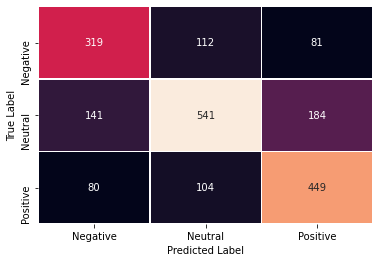


Model Performance on Test Data :
Micro Avg F1 Score: 0.648
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       522
           1       0.71      0.66      0.68       881
           2       0.62      0.65      0.64       607

    accuracy                           0.65      2010
   macro avg       0.64      0.65      0.64      2010
weighted avg       0.65      0.65      0.65      2010



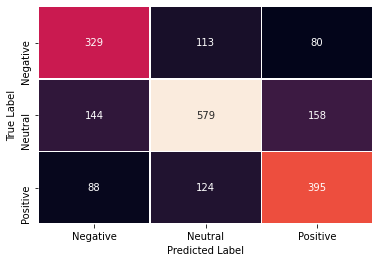

In [28]:
print ('CNN with Over/Underampling -  Model Performance :- ')
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
y_pred = np.array( [np.argmax(x) for x in y_pred])
model_acc(y_test, y_pred)

## 10. Ensemble of 2 CNN models
This is ensemble of 2 models designed to increase detection of negative sentiment
### 1st Model - Usual 3 Class Model
It classifies the data into 3 classes
### 2nd Model - Binary Classification
1. This classifies data into 2 classes - Negative Sentiment and Non-Negative Sentiment
2. It under-samples majority class (Non-Negative Sentiment) so that Negative and Non-Negative are balanced in training data.
### Ensemble of the 2 models
1. We classify the text with 2nd model. If it says a text as Negative sentiment we take it like that 
2. If second model says it Non Negative, we run 1st model and take classification from here which could be Positive, Neutral or Negative
3. This structure of the model will definitely increase recall of Negative sentiment as Negative can come from 1st or second models while Neutral and positive will come only from 2nd model.

Starting CNN Model without precreated embeddings - using ensembel of 2 models ..

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.42566, saving model to best_model.hdf5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.42566 to 0.51218, saving model to best_model.hdf5

Epoch 00003: val_sparse_categorical_accuracy improved from 0.51218 to 0.54799, saving model to best_model.hdf5

Epoch 00004: val_sparse_categorical_accuracy improved from 0.54799 to 0.57583, saving model to best_model.hdf5

Epoch 00005: val_sparse_categorical_accuracy improved from 0.57583 to 0.59722, saving model to best_model.hdf5

Epoch 00006: val_sparse_categorical_accuracy improved from 0.59722 to 0.61661, saving model to best_model.hdf5

Epoch 00007: val_sparse_categorical_accuracy improved from 0.61661 to 0.62954, saving model to best_model.hdf5

Epoch 00008: val_sparse_categorical_accuracy improved from 0.62954 to 0.63302, saving model to best_model.hdf5

Epoch 00009: val_sparse_c

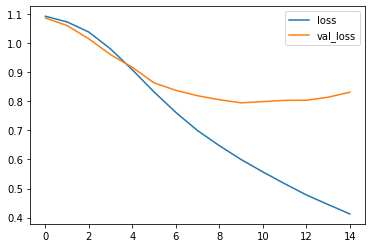

4253 11828
(8506, 61) (8506,)
4253 7055

Epoch 00001: val_accuracy improved from -inf to 0.49925, saving model to best_model.hdf5

Epoch 00002: val_accuracy did not improve from 0.49925

Epoch 00003: val_accuracy did not improve from 0.49925

Epoch 00004: val_accuracy improved from 0.49925 to 0.57434, saving model to best_model.hdf5

Epoch 00005: val_accuracy improved from 0.57434 to 0.63600, saving model to best_model.hdf5

Epoch 00006: val_accuracy improved from 0.63600 to 0.68722, saving model to best_model.hdf5

Epoch 00007: val_accuracy improved from 0.68722 to 0.70413, saving model to best_model.hdf5

Epoch 00008: val_accuracy improved from 0.70413 to 0.71755, saving model to best_model.hdf5

Epoch 00009: val_accuracy did not improve from 0.71755

Epoch 00010: val_accuracy improved from 0.71755 to 0.72203, saving model to best_model.hdf5

Epoch 00011: val_accuracy improved from 0.72203 to 0.72899, saving model to best_model.hdf5

Epoch 00012: val_accuracy improved from 0.72899 to

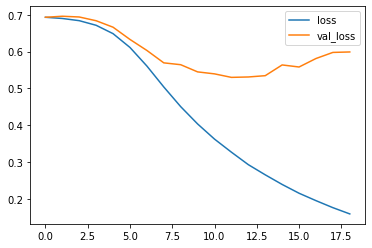

In [29]:
print ('Starting CNN Model without precreated embeddings - using ensembel of 2 models ..')
seed(777)
embed_dim = 100
max_words = 5500

tokenizer = Tokenizer(num_words= max_words)
tokenizer.fit_on_texts(df_train.Text_p.values)
X_train = tokenizer.texts_to_sequences(df_train.Text_p.values)
X_test = tokenizer.texts_to_sequences(df_test.Text_p.values)
X_valid = tokenizer.texts_to_sequences(df_valid.Text_p.values)
#print(len(X_train), len(X_test) )

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)

y_train = df_train['Target'].values
y_test = df_test['Target'].values
y_valid = df_valid['Target'].values



model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3,activation='softmax'))

opt = Adam(.00005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_sparse_categorical_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], 
                    batch_size = 32, verbose = 0, class_weight = class_weight)


val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()
model_3class = load_model('best_model.hdf5')

y_train1 = np.where(y_train==2, 1, y_train)
y_valid1 = np.where(y_valid==2, 1, y_valid)
print ( sum(y_train1 == 0),  sum(y_train1 == 1) )
#oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
undersample = imblearn.under_sampling.RandomUnderSampler( sampling_strategy='not minority')
X_resamp, y_resamp = undersample.fit_resample(X_train, y_train1)
print(X_resamp.shape, y_resamp.shape)


print ( sum(y_train == 0),  sum(y_train == 1) )
model1 = Sequential()
model1.add(Embedding(max_words, embed_dim)) #The embedding layer
model1.add(Conv1D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dropout(.5))
model1.add(Dense(1,activation='sigmoid'))
opt = Adam(.00005)
model1.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 5)

history = model1.fit(X_resamp, y_resamp, epochs=50,validation_data=(X_valid, y_valid1), callbacks=[checkpoint, early_stop], batch_size = 32,verbose = 0)
val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
plt.show()

model_2class = load_model('best_model.hdf5')


Model Performance: CNN Model  - using ensembel of 2 models

Model Performance on Validation Data :
Micro Avg F1 Score: 0.621
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.77      0.59       512
           1       0.73      0.56      0.64       866
           2       0.70      0.58      0.63       633

    accuracy                           0.62      2011
   macro avg       0.64      0.64      0.62      2011
weighted avg       0.66      0.62      0.62      2011



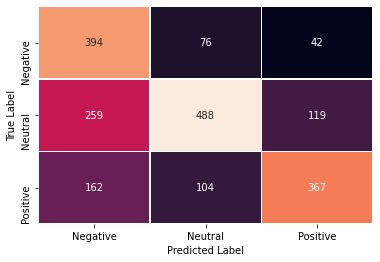


Model Performance on Test Data :
Micro Avg F1 Score: 0.614
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.77      0.58       522
           1       0.73      0.57      0.64       881
           2       0.71      0.54      0.61       607

    accuracy                           0.61      2010
   macro avg       0.64      0.63      0.61      2010
weighted avg       0.66      0.61      0.62      2010



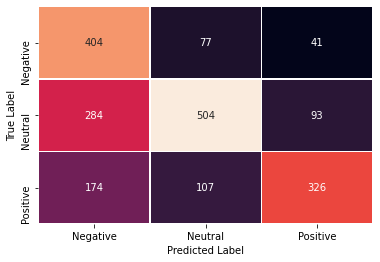

In [30]:
print ('Model Performance: CNN Model  - using ensembel of 2 models')

print ('\nModel Performance on Validation Data :')
y_pred1 = model_2class.predict(X_valid).flatten().round()
y_pred2 = model_3class.predict(X_valid) 
y_pred2 = np.array( [np.argmax(x) for x in y_pred2])

y_pred = y_pred1.copy()
for i in range (len(y_pred)):
    if y_pred[i] != 0:
        y_pred[i] = y_pred2[i]

model_acc(y_valid, y_pred)

print ('\nModel Performance on Test Data :')
y_pred1 = model1.predict(X_test).flatten().round()
y_pred2 = model.predict(X_test) 
y_pred2 = np.array( [np.argmax(x) for x in y_pred2])

y_pred = y_pred1.copy()
for i in range (len(y_pred)):
    if y_pred[i] != 0:
        y_pred[i] = y_pred2[i]
model_acc(y_test, y_pred)

In [31]:
#Saving model nd associated training objects 
model_3class.save('model_3class.hd5')
model_2class.save('model_2class.hd5')
model_ensem_dict = {'tokenizer': tokenizer, 'maxlen':maxlen,'text_cleaner': text_cleaner}
pickle.dump(model_ensem_dict, open('model_ensem_dict.pkl', 'wb'))

INFO:tensorflow:Assets written to: model_3class.hd5/assets
INFO:tensorflow:Assets written to: model_2class.hd5/assets


## 11. CNN Regression Model
1. **In this model I took Negative class as -1, Neutral as 0 and Positive as 1**
2. Instead of classification, created a regression model (using CNN)
3. This allows setting of thresholds as needed e.g. to detect more Negatives we can set the threshold accordingly

Starting CNN Model with Regression type target..
(16081, 61) (2010, 61) (16081,) (2010,)
Epoch 1/50


/Users/sanigam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sanigam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


502/503 [============================>.] - ETA: 0s - loss: 0.5594 - mse: 0.5594
Epoch 00001: val_mse improved from inf to 0.56220, saving model to best_model.hdf5
503/503 [==============================] - 4s 9ms/step - loss: 0.5592 - mse: 0.5592 - val_loss: 0.5622 - val_mse: 0.5622
Epoch 2/50
498/503 [============================>.] - ETA: 0s - loss: 0.5502 - mse: 0.5502
Epoch 00002: val_mse improved from 0.56220 to 0.54989, saving model to best_model.hdf5
503/503 [==============================] - 4s 8ms/step - loss: 0.5497 - mse: 0.5497 - val_loss: 0.5499 - val_mse: 0.5499
Epoch 3/50
498/503 [============================>.] - ETA: 0s - loss: 0.5209 - mse: 0.5209
Epoch 00003: val_mse improved from 0.54989 to 0.51365, saving model to best_model.hdf5
503/503 [==============================] - 4s 8ms/step - loss: 0.5209 - mse: 0.5209 - val_loss: 0.5137 - val_mse: 0.5137
Epoch 4/50
503/503 [==============================] - ETA: 0s - loss: 0.4633 - mse: 0.4633
Epoch 00004: val_mse improv

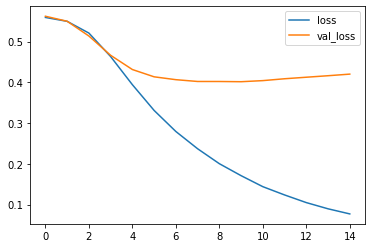

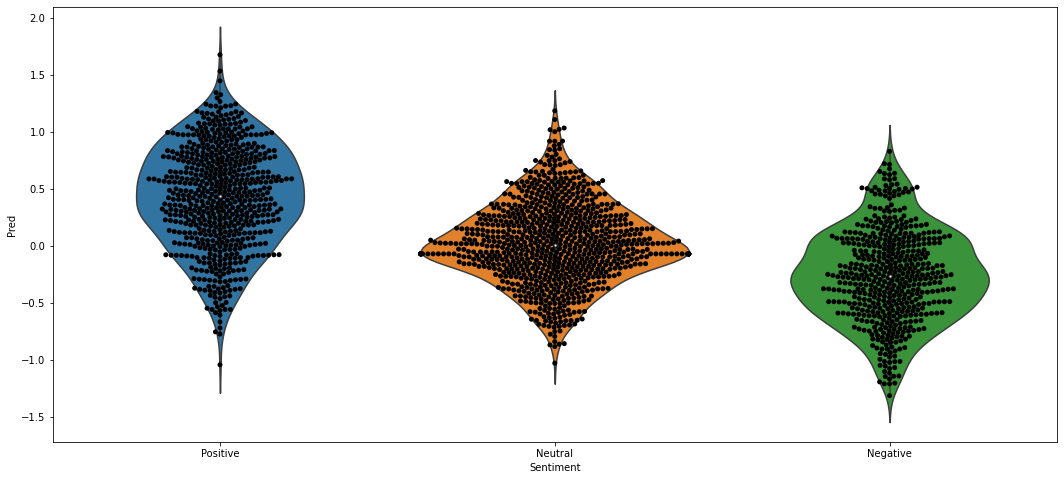

In [32]:
print ('Starting CNN Model with Regression type target..')

seed(777)
df_train.loc[:,'Target1'] = df_train['Sentiment'].map({'Negative': -1, 'Neutral': 0,'Positive': 1 })
df_valid.loc[:,'Target1'] = df_valid['Sentiment'].map({'Negative': -1, 'Neutral': 0,'Positive': 1 })
df_test.loc[:, 'Target1'] = df_test['Sentiment'].map({'Negative': -1, 'Neutral': 0,'Positive': 1 })

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen = maxlen)
y_train = df_train['Target1'].values
y_test = df_test['Target1'].values
y_valid = df_valid['Target1'].values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

embed_dim = 100
model = Sequential()
model.add(Embedding(max_words, embed_dim)) #The embedding layer
model.add(Conv1D(filters=32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='linear'))


opt = Adam(.00005)
model.compile(optimizer=opt,loss='mse', metrics=['mse'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_mse', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
early_stop = EarlyStopping(monitor='val_mse', verbose = 1, patience = 5)

history = model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid), callbacks=[checkpoint, early_stop], batch_size = 32, verbose = 1)

val = pd.DataFrame(history.history)
val[['loss', 'val_loss']].plot()
model = load_model('best_model.hdf5')

y_pred = model.predict(X_valid)
df_valid['Pred'] = y_pred
plt.figure(figsize=(18,8))
sns.swarmplot(x = 'Sentiment', y ='Pred', data =  df_valid ,color = 'black')
sns.violinplot(x = 'Sentiment', y ='Pred', data =  df_valid)
plt.show()



Model Performance: CNN Model  - Regression

Model Performance on Validation Data :
Micro Avg F1 Score: 0.47
Classification Report:
              precision    recall  f1-score   support

          -1       0.38      0.82      0.52       512
           0       0.47      0.34      0.39       866
           1       0.82      0.37      0.51       633

    accuracy                           0.47      2011
   macro avg       0.56      0.51      0.47      2011
weighted avg       0.56      0.47      0.46      2011



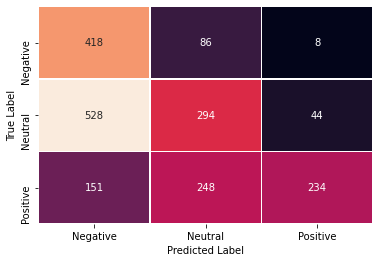


Model Performance on Test Data :
Micro Avg F1 Score: 0.459
Classification Report:
              precision    recall  f1-score   support

          -1       0.37      0.81      0.51       522
           0       0.48      0.33      0.39       881
           1       0.81      0.35      0.49       607

    accuracy                           0.46      2010
   macro avg       0.55      0.50      0.46      2010
weighted avg       0.55      0.46      0.45      2010



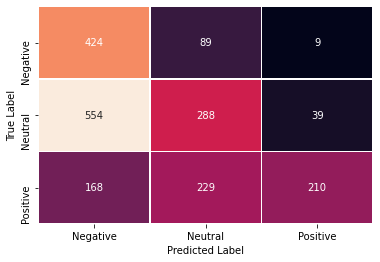

In [33]:
print ('Model Performance: CNN Model  - Regression')
def clf_thres (p):
    if p >= .6:
        return 1
    elif p >= .1:
        return 0
    else:
        return -1
    
print ('\nModel Performance on Validation Data :')
y_pred = model.predict(X_valid)
df_valid['Pred'] = y_pred
df_valid['Pred1'] = df_valid['Pred'].apply(lambda x: clf_thres(x))
model_acc(y_valid, df_valid['Pred1'].values)

print ('\nModel Performance on Test Data :')
y_pred = model.predict(X_test)
df_test['Pred'] = y_pred
df_test['Pred1'] = df_test['Pred'].apply(lambda x: clf_thres(x))
model_acc(y_test, df_test['Pred1'].values)



## Conclusion
1. I think following 2 models are giving good overall performance in terms of accuracy and training resources

### A) CNN Conv1D Model without pre-created embedding (Model 6) :- 
This model gives overall good performance and run much faster than LSTM models.

Model Performance on Test Data :

Micro Avg F1 Score: 0.672

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       522
           1       0.67      0.78      0.73       881
           2       0.68      0.61      0.64       607

    accuracy                           0.67      2010 
    
    
    
### B) Ensemble of 2 CNN Models (Model 10) :- 
This improves recall of Negative sentiments without sacrificing too much on overall performance.

Model Performance on Test Data :

Micro Avg F1 Score: 0.613

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.78      0.59       522
           1       0.72      0.58      0.64       881
           2       0.72      0.51      0.60       607

    accuracy                           0.61      2010
2. Next section shows production deployment approach and individual text prediction from these 2 models


## Production Deployment of Models
1. Since we choose Model 6 as  main model  and Model 10 for boosting Negative sentiments , I am showing production deployment approach for these 2 only.
2. The Prediction Function (predict_fn) shown below may be used for deploying  into production to give sentiment for individual texts
3.Code below loads models and related objects from saved files and demonstrates usage.
4.For production deployment we will just need following:
    1. Import of relevant libraries
    2. The .pkl file and .hd5 file(s) for model to be deployed (6 or 10)
    3. predict_fn to be used for prediction of sentiment


In [34]:
# Sample texts from test data to make prediction (unit test)
text_neg ='Touba me saba k ghr gai hoe thi kal'
text_neu = 'Heming bird'
text_pos = 'Wohooo just love it P.s: That phupii ka walima cracked me up'

mapping_dict = {0: 'Negative', 1:'Neutral', 2:'Positive'}

### Production Deployment - CNN Conv1D Model without pre-created embedding (Model 6)

In [35]:
#Loading model and associated training objects
tokenizer = model_cnn_dict ['tokenizer']
text_cleaner = model_cnn_dict ['text_cleaner']
maxlen = model_cnn_dict ['maxlen']

model_cnn = load_model('model_cnn.hd5')
model_cnn_dict = pickle.load(open('model_cnn_dict.pkl', 'rb'))


#Prediction Funnction
def  predict_fn(text, model):
    text = text_cleaner(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences (text, padding = 'post', maxlen = maxlen)
    pred = np.argmax(model_cnn.predict(text))
    return (mapping_dict[pred] )



In [36]:
#Unit tests
print ( 'Text:', text_neg , '  Sentiment:' , predict_fn(text_neg , model) )
print ( 'Text:', text_neu , '  Sentiment:' , predict_fn(text_neu, model ) )
print ( 'Text:', text_pos , '  Sentiment:' , predict_fn(text_pos, model ) )

Text: Touba me saba k ghr gai hoe thi kal   Sentiment: Negative
Text: Heming bird   Sentiment: Neutral
Text: Wohooo just love it P.s: That phupii ka walima cracked me up   Sentiment: Positive


### Production Deployment  -  Ensemble of 2 CNN Models (Model 10)

In [37]:
#Loading models and associated training objects
model_ensem_dict = pickle.load(open('model_ensem_dict.pkl', 'rb'))
tokenizer = model_ensem_dict['tokenizer']
text_cleaner = model_ensem_dict['text_cleaner']
maxlen = model_ensem_dict['maxlen']

model_2class = load_model('model_2class.hd5')
model_3class = load_model('model_3class.hd5')

#Prediction Funnction
def  predict_fn(text, model_a, model_b):
    text = text_cleaner(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences (text, padding = 'post', maxlen = maxlen)
    y_pred1 = model_b.predict(text).flatten().round()[0]
    y_pred2 = np.argmax(model_a.predict(text))
    if y_pred1 != 0:
        y_pred1 = y_pred2
    return (mapping_dict[y_pred1] )


In [38]:
#Unit Tests
print ( 'Text:', text_neg , '  Sentiment:' , predict_fn(text_neg , model_3class, model_2class) )
print ( 'Text:', text_neu , '  Sentiment:' , predict_fn(text_neu,  model_3class, model_2class ) )
print ( 'Text:', text_pos , '  Sentiment:' , predict_fn(text_pos,  model_3class, model_2class ) )

Text: Touba me saba k ghr gai hoe thi kal   Sentiment: Negative
Text: Heming bird   Sentiment: Neutral
Text: Wohooo just love it P.s: That phupii ka walima cracked me up   Sentiment: Positive
